In [15]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, RocCurveDisplay



In [50]:
# coupon_type = 'Restaurant20To50'
coupon_type = 'CarryAway'

with open(f'model/phase2/{coupon_type}_best_model_RFC.pickle', "rb") as f: 
    best_model_rfc = pickle.load(f)

with open(f'model/phase2/{coupon_type}_best_model_KNN.pickle', "rb") as f: 
    best_model_knn = pickle.load(f)

with open(f'model/phase2/{coupon_type}_best_model_LogisticRegression.pickle', "rb") as f: 
    best_model_lr = pickle.load(f)

X_test = pd.read_csv(f'data/{coupon_type}_X_test_phase2.csv')
y_test = pd.read_csv(f'data/{coupon_type}_y_test_phase2.csv')

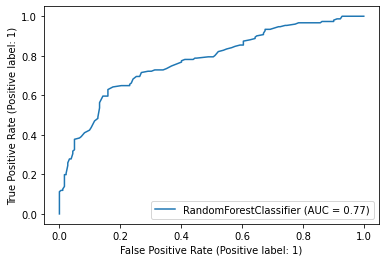

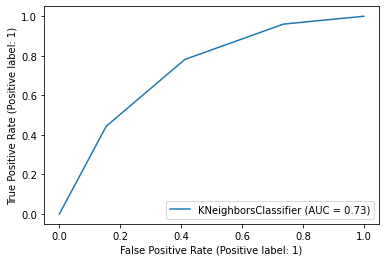

In [46]:
RocCurveDisplay.from_estimator(best_model_rfc, X_test.values, y_test)
RocCurveDisplay.from_estimator(best_model_knn, X_test.values, y_test)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

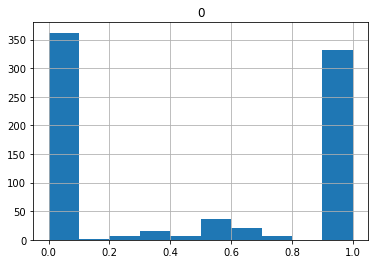

In [36]:
y_test_score = best_model.estimators_[10].predict_proba(X_test.values)[:, 1]
pd.DataFrame(y_test_score).hist()

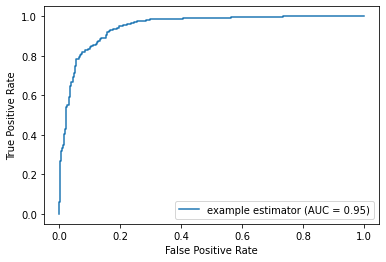

In [38]:
y_test_score = best_model.predict_proba(X_test.values)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
roc_auc_val = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_val,
                                  estimator_name='example estimator')

display.plot()
plt.show()

In [51]:
y_test_score_rfc = best_model_rfc.predict_proba(X_test.values)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_test_score_rfc)
roc_auc_val_rfc = auc(fpr_rfc, tpr_rfc)

y_test_score_knn = best_model_knn.predict_proba(X_test.values)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_score_knn)
roc_auc_val_knn = auc(fpr_knn, tpr_knn)

y_test_score_lr = best_model_lr.predict_proba(X_test.values)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_score_lr)
roc_auc_val_lr = auc(fpr_lr, tpr_lr)

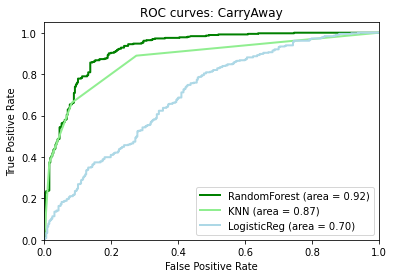

In [55]:
plt.figure()
lw = 2
plt.plot(
    fpr_rfc,
    tpr_rfc,
    color="green",
    lw=lw,
    label="RandomForest (area = %0.2f)" % roc_auc_val_rfc,
)
plt.plot(
    fpr_knn,
    tpr_knn,
    color="lightgreen",
    lw=lw,
    label="KNN (area = %0.2f)" % roc_auc_val_knn,
)
plt.plot(
    fpr_lr,
    tpr_lr,
    color="lightblue",
    lw=lw,
    label="LogisticReg (area = %0.2f)" % roc_auc_val_lr,
)
# plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curves: {coupon_type}")
plt.legend(loc="lower right")
plt.show()

# Probability distribution

Create separate histograms for accept and reject (ie split on true label)

In [ ]:
X_test_extended['proba_accept'] = best_model.predict_proba(X_test)[:, 1]

In [ ]:
X_test_extended.loc[(X_test_extended.proba_accept >= 0.4) & (X_test_extended.proba_accept <= 0.6), 
               ['accept_Y', 'proba_accept']].hist()